In [2]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float
import ipywidgets as widgets
from ipywidgets import interact,interactive,interact_manual
import time
from imageio import imwrite
from skimage import img_as_ubyte


color_images = {
    "fez": img_as_float(plt.imread("IMG_1.jpeg")), #.astype(float)
    "marroc": img_as_float(plt.imread("IMG_2.jpeg")), #.astype(float)
    "noruega": img_as_float(plt.imread("IMG_3.jpeg")),
    "cova": img_as_float(plt.imread("IMG_4.jpeg")),
    "mallorca": img_as_float(plt.imread("IMG_5.jpeg")),
    "piano": img_as_float(plt.imread("IMG_6.jpeg")),
    "pompeia": img_as_float(plt.imread("IMG_7.jpeg")),
    "pirineus": img_as_float(plt.imread("IMG_8.jpeg")),
    "aurora": img_as_float(plt.imread("IMG_9.jpeg")),
    "bb": img_as_float(plt.imread("IMG_10.jpeg"))
}

In [3]:
def compress_svd(image,k):
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
   
    return reconst_matrix,s


In [4]:
def compress_show_color_images_layer(img_name,k):
    """
     compress and display the reconstructed color image using the layer method 
    """
    image = color_images[img_name]
    original_shape = image.shape
    image_reconst_layers = [compress_svd(image[:,:,i],k)[0] for i in range(3)]
    image_reconst = np.zeros(image.shape)
    for i in range(3):
        image_reconst[:,:,i] = image_reconst_layers[i]
    
    compression_ratio =100.0*3* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1]*original_shape[2])
    frob_percentage =  100*(np.linalg.norm(image) /np.linalg.norm(image_reconst))
    
    plt.title("compression ratio={:.2f}".format(compression_ratio)+"%")
    #plt.title("Frobenius ratio={:.2f}".format(frob_percentage)+"%")
    print("compression ratio={:.2f}".format(compression_ratio)+"%")
    
    plt.imshow(image_reconst)
    
    return image_reconst, compression_ratio



In [5]:
def compute_k_max_color_images_layers(img_name):
    image = color_images[img_name]
    original_shape = image.shape
    return (original_shape[0]*original_shape[1]*original_shape[2])// (3*(original_shape[0] + original_shape[1] + 1))

widget = False
## Turn on if running in notebook so we can visualize an slider that illustrates
## the compression for different values of k gradually
if widget:
    list_widget = widgets.Dropdown(options=list(color_images.keys()))
    int_slider_widget = widgets.IntSlider(min=1,max=compute_k_max_color_images_layers('cat'))
    def update_k_max_color_layers(*args):
        img_name=list_widget.value
        int_slider_widget.max = compute_k_max_color_images_layers(img_name)
    list_widget.observe(update_k_max_color_layers,'value')


In [12]:
def importImages(image_name):
    k_max = int(compute_k_max_color_images_layers(image_name))
    
    print('Importing images:')
    print('---- k = 5')
    image, ratio = compress_show_color_images_layer(image_name, 5)
    timestr = time.strftime("%Y%m%d-%H%M%S")
    name = ("./output_"+image_name+"/frobPerc_{:.2f}".format(ratio)+"_"+timestr+".jpeg")
    imwrite(name, image)
    
    for k in range(1, 100):
        if k %10 ==0:
            print('---- k =', k)
            image, ratio = compress_show_color_images_layer(image_name, k)
            timestr = time.strftime("%Y%m%d-%H%M%S")
            name = ("./output_"+image_name+"/frobPerc_{:.2f}".format(ratio)+"_"+timestr+".jpeg")
            #imwrite(name, img_as_ubyte(image))
            imwrite(name, image)
        
    interval = k_max - 100
    step = int(interval / 5)
    #print(step)

    for i in range(5):
        print('---- k =', 100 + step*i)
        image, ratio = compress_show_color_images_layer(image_name, 100 + step*i)
        timestr = time.strftime("%Y%m%d-%H%M%S")
        name = ("./output_"+image_name+"/frobPerc_{:.2f}".format(ratio)+"_"+timestr+".jpeg")
        #imwrite(name, img_as_ubyte(image))        
        imwrite(name, image)


Importing images:
---- k = 5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Lossy conversion from float64 to uint8. Range [-0.37809860398958917, 1.1345533045589722]. Convert image to uint8 prior to saving to suppress this warning.


compression ratio=0.78%
---- k = 10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Lossy conversion from float64 to uint8. Range [-0.23211892557477518, 1.195150381727052]. Convert image to uint8 prior to saving to suppress this warning.


compression ratio=1.56%
---- k = 20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Lossy conversion from float64 to uint8. Range [-0.23962670134728872, 1.2059669814864906]. Convert image to uint8 prior to saving to suppress this warning.


compression ratio=3.13%
---- k = 30


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Lossy conversion from float64 to uint8. Range [-0.22305203694900844, 1.1706278016241272]. Convert image to uint8 prior to saving to suppress this warning.


compression ratio=4.69%
---- k = 40


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Lossy conversion from float64 to uint8. Range [-0.1620282869557663, 1.215934040426738]. Convert image to uint8 prior to saving to suppress this warning.


compression ratio=6.25%
---- k = 50


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Lossy conversion from float64 to uint8. Range [-0.14819828250363948, 1.1763724151355723]. Convert image to uint8 prior to saving to suppress this warning.


compression ratio=7.82%
---- k = 60


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Lossy conversion from float64 to uint8. Range [-0.14814089841684155, 1.1571897620864133]. Convert image to uint8 prior to saving to suppress this warning.


compression ratio=9.38%
---- k = 70


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Lossy conversion from float64 to uint8. Range [-0.1126259207837289, 1.1303433062115424]. Convert image to uint8 prior to saving to suppress this warning.


compression ratio=10.95%
---- k = 80


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Lossy conversion from float64 to uint8. Range [-0.1289990885521462, 1.118682036359583]. Convert image to uint8 prior to saving to suppress this warning.


compression ratio=12.51%
---- k = 90


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Lossy conversion from float64 to uint8. Range [-0.1033117267149286, 1.121116383748739]. Convert image to uint8 prior to saving to suppress this warning.


compression ratio=14.07%
---- k = 100


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Lossy conversion from float64 to uint8. Range [-0.09217434298128918, 1.1046096730035073]. Convert image to uint8 prior to saving to suppress this warning.


compression ratio=15.64%
---- k = 207


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Lossy conversion from float64 to uint8. Range [-0.03892566217787031, 1.0591376010676485]. Convert image to uint8 prior to saving to suppress this warning.


compression ratio=32.37%
---- k = 314


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Lossy conversion from float64 to uint8. Range [-0.018229586598858476, 1.044868032730357]. Convert image to uint8 prior to saving to suppress this warning.


compression ratio=49.10%
---- k = 421


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Lossy conversion from float64 to uint8. Range [-0.012126674046949368, 1.0290439763550632]. Convert image to uint8 prior to saving to suppress this warning.


compression ratio=65.83%
---- k = 528


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Lossy conversion from float64 to uint8. Range [-0.012242570087106793, 1.0205842797644693]. Convert image to uint8 prior to saving to suppress this warning.


compression ratio=82.56%


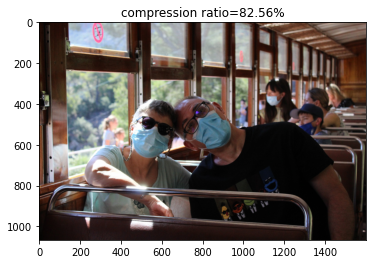

In [13]:
importImages('mallorca')     


compression ratio=0.24%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


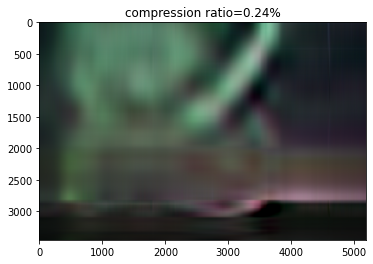

In [9]:
image_name = 'aurora'
image, ratio = compress_show_color_images_layer(image_name, 5)
timestr = time.strftime("%Y%m%d-%H%M%S")
name = ("./output_"+image_name+"/frobPerc_{:.2f}".format(ratio)+"_"+timestr+".jpeg")
imwrite(name, img_as_ubyte(image))

## 3 Principal component analysis (PCA)

**Question 1: The file `example.dat` contains a dataset of 16 observations of 4 variables. Perform PCA analysis using both the covariance matrix and the correlation matrix. The code must write down the portion of the total variance accumulated in each of the principal components, the standard deviation of each of the principal components and the expression of the original dataset in the new PCA coordinates.**

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
#import scipy
from scipy.linalg import ldl
from scipy.linalg import solve_triangular
import scipy.sparse as spsp
from scipy.sparse import csc_matrix, linalg as spspla


def load_matrix(file_name, n, m):
    '''
        This function uploads the matrix in the file file_name with n rows and m columns

    Parameters
    ----------
    file_name : string
    n : number of rows
    m : number of cols

    Returns
    -------
    Matrix

    '''
    
    rows,cols,data=np.loadtxt(file_name,unpack=True)
    rows=rows-1; cols=cols-1;
    A=spsp.coo_matrix((data,(rows,cols)),shape=(n,m))
    cscA = spsp.csc_matrix(A)
    if n==m:
        ## The symmetric matrices are stored just in one triangular side 
        diagonalG = np.zeros((n,n))
        for i in range(0,n):
            diagonalG[i,i] = cscA[i,i]
            
        cscG_lower = cscA.T - diagonalG
        cscG_sym = cscA + cscG_lower
        return cscG_sym 
        
    return A.todense()


In [3]:
n = 16 # Observations
m = 4 # Variables
#A = load_matrix('example.dat', n, m)

#A = np.loadtxt('example.dat')

In [7]:
A = np.loadtxt('./proj2/example.dat')
print(A.shape)
A = A.T
print(A.shape)
n = A.shape[1]
m = A.shape[0]

(16, 4)
(4, 16)


### PCA study over the covariance matrix

Considering $C_A= \frac{1}{n-1} A A^T \in \mathbb{R}^{m\times m}$. We seek to find the eigenvectors of the covariance matrix since they correspond to the principal components of $A$, determining the directions of maximum variance with respect to the data given. 

Since the computation of $C_A$ is highly numercally unstable, in order to avoid unstabilities we may compute the SVD decomposition in the following way:
1. We consider $Y=\frac{1}{\sqrt{n-1}} A^T$. Then, note that $Y^TY = C_A$.
2. The compute the reduced SVD decomposition of $Y=USV^T$, with $U\in \mathbb{R}^{n\times r}, S\in \mathbb{R}^{r\times r}, V\in \mathbb{R}^{r\times m}$ where $r = $ rank $(Y)$.
3. Then the singular values $s_i$ are such that $\lambda_i = s_i^2$, where $\lambda_i$ are the eigenvalues of $C_A$ indicating the amount of variance that the corresponding direction $v_i$ accumulates: $\lambda_i / \sum_{j=1}^r \lambda_j$, where clearly $\sum_{j=1}^r \lambda_j$ accounts for the total variance. 
4. Similarly, $V$ contains the eigenvectors of $C_A$ as columns, hence the principal components as a function of the old variables (coefficients of the combination, also called the *loadings* in the PCA context). Then the new PCA coordinates are given by $V^T A$.  

In [10]:

import numpy as np
from numpy.linalg import svd


def computePCA(A):
    n = A.shape[1]
    m = A.shape[0]
    r = np.linalg.matrix_rank(A)
    
    Y = 1/np.sqrt(n-1)* A.T
    U,s,V = svd(Y,full_matrices=False)
    #reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    print(U.shape, s.shape, V.shape)
    eigvals = s**2
    print(s, eigvals)
    propV = np.zeros(s.shape)
    totalV = np.sum(eigvals)
    for i in range(s.shape[0]):
        propV[i] = eigvals[i]/totalV
    
    PCA = np.matmul(V.T, A)
    
    for i in range(len(propV)):
        print('The principal component with variance proprotion {:.3f}'.format(propV[i])+' is given by the direction:', V[:, i])  
    
    print('--------------')
    print('The expression of the original variables in terms of the principal components is given as follows:')

    for i in range(len(propV)):
        print(PCA[:, i])
        
    return PCA, propV

In [11]:
VV, lamb = computePCA(A)

(16, 4) (4,) (4, 4)
[9.67717926 2.98740437 1.38390184 0.7158438 ] [93.64779846  8.92458488  1.91518432  0.51243235]
The principal component with variance proprotion 0.892 is given by the direction: [-0.4390472   0.72389617  0.52933835  0.05488905]
The principal component with variance proprotion 0.085 is given by the direction: [-0.544242    0.25276353 -0.79957979  0.02415363]
The principal component with variance proprotion 0.018 is given by the direction: [-0.49623305 -0.49926238  0.20052205  0.6813815 ]
The principal component with variance proprotion 0.005 is given by the direction: [-0.51457844 -0.4035121   0.20065885 -0.72946764]
--------------
The expression of the original variables in terms of the principal components is given as follows:
[ 2.79276889 -4.30375921 -2.146618   -7.42092513]
[ 0.26681291 -4.60225573 -3.20761135 -5.87020293]
[ 2.65310011 -5.33194891 -0.76545208 -7.54622182]
[ 3.56604268 -1.67898419 -3.73133531 -7.38522095]


In [12]:
print(lamb)

[0.89188379 0.08499605 0.01823985 0.00488031]


In [13]:
print(VV)

[[ 2.79276889  0.26681291  2.65310011  3.56604268  4.91507977  1.48464532
   3.98560294  3.32210723  5.86259266  5.71245497  7.02553603  6.90673991
   4.9935163   5.75281457  6.82546679  5.38318587]
 [-4.30375921 -4.60225573 -5.33194891 -1.67898419 -5.91748011 -3.78109658
  -2.52687124 -5.10333901 -4.99731171 -5.26224183 -4.20030619 -6.40400207
  -3.93040708 -5.04561897 -2.90479165 -5.75817657]
 [-2.146618   -3.20761135 -0.76545208 -3.73133531 -2.5589502  -2.52925918
  -4.89357626 -1.94609595  1.98779179  2.81654169  1.98476246 -0.4840585
   2.10138366  0.62502879  0.91771046  3.68307164]
 [-7.42092513 -5.87020293 -7.54622182 -7.38522095 -9.0706777  -6.48860424
  -5.72562681 -7.22026627 -7.46361619 -3.96784098 -7.35254985 -8.36967076
  -6.01671687 -6.0046809  -5.57969498 -5.94135471]]


In [14]:
for i in range(len(lamb)):
    print('The principal component with variance proprotion {:.3f}'.format(lamb[i])+' is given by the direction:', VV[:, i])

The principal component with variance proprotion 0.892 is given by the direction: [ 2.79276889 -4.30375921 -2.146618   -7.42092513]
The principal component with variance proprotion 0.085 is given by the direction: [ 0.26681291 -4.60225573 -3.20761135 -5.87020293]
The principal component with variance proprotion 0.018 is given by the direction: [ 2.65310011 -5.33194891 -0.76545208 -7.54622182]
The principal component with variance proprotion 0.005 is given by the direction: [ 3.56604268 -1.67898419 -3.73133531 -7.38522095]


We seek to conduct now the same study but over the correlation matrix, which is given by the covariance matrix of the standarized initial data 

In [34]:
Y = 1/np.sqrt(n-1)* A.T
CA=np.matmul(Y.T, Y)
print(CA)

[[23.26666667 23.2        17.4        18.73333333]
 [23.2        29.53333333 23.86666667 25.        ]
 [17.4        23.86666667 25.6        25.53333333]
 [18.73333333 25.         25.53333333 26.6       ]]


In [42]:
A = np.loadtxt('./proj2/example.dat')
print(A.shape)
A = A.T
print(A.shape)

(16, 4)
(4, 16)


In [44]:
Corr = np.corrcoef(A)
Corr
#np.matmul(A, A.T)

array([[ 1.        ,  0.1856123 , -0.63202219, -0.5802668 ],
       [ 0.1856123 ,  1.        , -0.14621516, -0.11858645],
       [-0.63202219, -0.14621516,  1.        ,  0.85285436],
       [-0.5802668 , -0.11858645,  0.85285436,  1.        ]])

In [54]:
print(A[:, 1])
print(np.mean(A[:, 1]))
print(np.std(A[:,1]))
print(np.repeat(np.mean(A[:, 1]), len(A[:, 1])))
standarized = (A[:,1] - np.repeat(np.mean(A[:, 1]), len(A[:, 1])) ) /np.std(A[:,1])
print(standarized)
print(np.mean(standarized))

[7. 3. 2. 2.]
3.5
2.0615528128088303
[3.5 3.5 3.5 3.5]
[ 1.69774938 -0.24253563 -0.72760688 -0.72760688]
5.551115123125783e-17


In [63]:
def computePCA_corr(A):
    n = A.shape[1]
    m = A.shape[0]
    r = np.linalg.matrix_rank(A)
    
    A_stand = np.zeros(A.shape)
    ## Compute the correlation matrix:
    for i in range(n):
        A_stand[:, i] = (A[:,i] - np.repeat(np.mean(A[:, i]), len(A[:, i])) ) /np.std(A[:,i])
    #print(A_stand)
    
    ## now we compute the covariance matrix of the standarized matrix:
    Y = 1/np.sqrt(n-1)* A_stand.T
    
    ## checking that the matrix corresponds to the correlation matrix:
    print(np.corrcoef(A))
    print(np.matmul(Y.T, Y))
    print(np.linalg.norm(np.corrcoef(A) - np.matmul(Y.T, Y)))
    
    U,s,V = svd(Y,full_matrices=False)
    #reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    print(U.shape, s.shape, V.shape)
    eigvals = s**2
    print(s, eigvals)
    propV = np.zeros(s.shape)
    totalV = np.sum(eigvals)
    for i in range(s.shape[0]):
        propV[i] = eigvals[i]/totalV
    
    PCA = np.matmul(V.T, A)
    
    for i in range(len(propV)):
        print('The principal component with variance proprotion {:.3f}'.format(propV[i])+' is given by the direction:', V[:, i])  
    
    print('--------------')
    print('The expression of the original variables in terms of the principal components is given as follows:')

    for i in range(len(propV)):
        print(PCA[:, i])
        
    return PCA, propV, A_stand

In [64]:
PCA_corr, propV_corr, A_stand = computePCA_corr(A)

[[ 1.          0.1856123  -0.63202219 -0.5802668 ]
 [ 0.1856123   1.         -0.14621516 -0.11858645]
 [-0.63202219 -0.14621516  1.          0.85285436]
 [-0.5802668  -0.11858645  0.85285436  1.        ]]
[[ 2.09891396 -0.00285852 -1.24070573 -0.85534971]
 [-0.00285852  0.57033315 -0.25458169 -0.31289295]
 [-1.24070573 -0.25458169  0.96223215  0.53305526]
 [-0.85534971 -0.31289295  0.53305526  0.6351874 ]]
1.6714229603208404
(16, 4) (4,) (4, 4)
[1.81665968e+00 8.63159230e-01 4.70500188e-01 1.28744066e-16] [3.30025238e+00 7.45043856e-01 2.21370427e-01 1.65750346e-32]
The principal component with variance proprotion 0.773 is given by the direction: [-0.77880162  0.35351733 -0.13599093 -0.5       ]
The principal component with variance proprotion 0.175 is given by the direction: [-0.08770943 -0.85254114  0.12442134 -0.5       ]
The principal component with variance proprotion 0.052 is given by the direction: [ 0.50520828  0.14068468 -0.68918242 -0.5       ]
The principal component with va

In [66]:
from sklearn.decomposition import PCA
# define a matrix
#A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(A)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)
# transform data
B = pca.transform(A)
print(B)

[[6. 5. 3. 4.]
 [7. 3. 2. 2.]
 [6. 4. 4. 5.]
 [5. 7. 1. 3.]
 [7. 7. 5. 5.]
 [6. 4. 2. 3.]
 [5. 7. 2. 1.]
 [6. 5. 4. 4.]
 [3. 5. 6. 7.]
 [1. 3. 7. 5.]
 [2. 6. 6. 7.]
 [5. 7. 7. 6.]
 [2. 4. 5. 6.]
 [3. 5. 6. 5.]
 [1. 6. 5. 5.]
 [2. 3. 7. 7.]]
[[ 0.59576605  0.10854723 -0.60530077 -0.51661522]
 [ 0.37861843  0.83426284  0.26751107  0.29848187]]
[9.3240832  2.21170517]
[[ 2.33616589  0.02763159]
 [ 4.35336868 -2.12675047]
 [ 1.10570266 -0.24063832]
 [ 3.68471106  0.48403484]
 [ 1.42180965  2.90827971]
 [ 3.34953464 -1.37262419]
 [ 4.11264074  0.15458217]
 [ 1.73086512  0.29514266]
 [-2.81688024  0.58975511]
 [-3.79757714 -2.1654601 ]
 [-3.30409906  1.04539952]
 [-1.49693922  2.98454685]
 [-2.39927754 -1.1891191 ]
 [-1.7836498  -0.00720863]
 [-2.2613339  -0.19769371]
 [-4.23504154 -1.18987794]]


In [60]:
A[:, 1]

array([7., 3., 2., 2.])

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_data = scaler.fit_transform(A)

print(standardized_data)

[[ 1.34164079  1.69774938  1.50755672  0.4472136   1.          1.52127766
   0.52414242  1.50755672 -1.52127766 -1.34164079 -1.69245584 -1.50755672
  -1.52127766 -1.60591014 -1.69245584 -1.20740686]
 [ 0.4472136  -0.24253563 -0.90453403  1.34164079  1.          0.16903085
   1.36277029  0.30151134 -0.16903085 -0.4472136   0.39056673  0.90453403
  -0.16903085  0.22941573  0.91132238 -0.76834982]
 [-1.34164079 -0.72760688 -0.90453403 -1.34164079 -1.         -1.18321596
  -0.73379939 -0.90453403  0.50709255  1.34164079  0.39056673  0.90453403
   0.50709255  1.14707867  0.39056673  0.98787834]
 [-0.4472136  -0.72760688  0.30151134 -0.4472136  -1.         -0.50709255
  -1.15311332 -0.90453403  1.18321596  0.4472136   0.91132238 -0.30151134
   1.18321596  0.22941573  0.39056673  0.98787834]]


In [66]:
print(A_stand)
print(np.corrcoef(A))
print(np.corrcoef(A_stand))

[[ 1.34164079  1.69774938  1.50755672  0.4472136   1.          1.52127766
   0.52414242  1.50755672 -1.52127766 -1.34164079 -1.69245584 -1.50755672
  -1.52127766 -1.60591014 -1.69245584 -1.20740686]
 [ 0.4472136  -0.24253563 -0.90453403  1.34164079  1.          0.16903085
   1.36277029  0.30151134 -0.16903085 -0.4472136   0.39056673  0.90453403
  -0.16903085  0.22941573  0.91132238 -0.76834982]
 [-1.34164079 -0.72760688 -0.90453403 -1.34164079 -1.         -1.18321596
  -0.73379939 -0.90453403  0.50709255  1.34164079  0.39056673  0.90453403
   0.50709255  1.14707867  0.39056673  0.98787834]
 [-0.4472136  -0.72760688  0.30151134 -0.4472136  -1.         -0.50709255
  -1.15311332 -0.90453403  1.18321596  0.4472136   0.91132238 -0.30151134
   1.18321596  0.22941573  0.39056673  0.98787834]]
[[ 1.          0.1856123  -0.63202219 -0.5802668 ]
 [ 0.1856123   1.         -0.14621516 -0.11858645]
 [-0.63202219 -0.14621516  1.          0.85285436]
 [-0.5802668  -0.11858645  0.85285436  1.        ]

In [69]:
## The standarization is correct
print(np.matmul(A_stand, A_stand.T)/(n-1))

## but this is not the correlation matrix, this is a covariance matrix again...

[[ 2.09891396 -0.00285852 -1.24070573 -0.85534971]
 [-0.00285852  0.57033315 -0.25458169 -0.31289295]
 [-1.24070573 -0.25458169  0.96223215  0.53305526]
 [-0.85534971 -0.31289295  0.53305526  0.6351874 ]]


In [20]:
A_stand = np.zeros(A.shape)
    
for i in range(m):
    A_stand[i, :] = (A[i,:] - np.repeat(np.mean(A[i, :]), len(A[i, :])) ) /np.std(A[i,:])
print(A_stand)
    

[[ 0.87637693  1.35989524  0.87637693  0.39285863  1.35989524  0.87637693
   0.39285863  0.87637693 -0.57417799 -1.54121461 -1.0576963   0.39285863
  -1.0576963  -0.57417799 -1.54121461 -1.0576963 ]
 [-0.04356068 -1.43750258 -0.74053163  1.35038121  1.35038121 -0.74053163
   1.35038121 -0.04356068 -0.04356068 -1.43750258  0.65341026  1.35038121
  -0.74053163 -0.04356068  0.65341026 -1.43750258]
 [-0.77459667 -1.29099445 -0.25819889 -1.80739223  0.25819889 -1.29099445
  -1.29099445 -0.25819889  0.77459667  1.29099445  0.77459667  1.29099445
   0.25819889  0.77459667  0.25819889  1.29099445]
 [-0.3992747  -1.56080112  0.1814885  -0.98003791  0.1814885  -0.98003791
  -2.14156433 -0.3992747   1.34301492  0.1814885   1.34301492  0.76225171
   0.76225171  0.1814885   0.1814885   1.34301492]]


In [22]:
print(np.matmul(A_stand, A_stand.T)/n)


[[ 1.          0.1856123  -0.63202219 -0.5802668 ]
 [ 0.1856123   1.         -0.14621516 -0.11858645]
 [-0.63202219 -0.14621516  1.          0.85285436]
 [-0.5802668  -0.11858645  0.85285436  1.        ]]


In [23]:
print(np.corrcoef(A))


[[ 1.          0.1856123  -0.63202219 -0.5802668 ]
 [ 0.1856123   1.         -0.14621516 -0.11858645]
 [-0.63202219 -0.14621516  1.          0.85285436]
 [-0.5802668  -0.11858645  0.85285436  1.        ]]


In [80]:
def computePCA_corr(A):
    n = A.shape[1]
    m = A.shape[0]
    r = np.linalg.matrix_rank(A)
    
    A_stand = np.zeros(A.shape)
    ## Compute the correlation matrix:
    for i in range(m):
        A_stand[i, :] = (A[i,:] - np.repeat(np.mean(A[i, :]), len(A[i, :])) ) /np.std(A[i,:])

    #print(A_stand)
    
    ## now we compute the covariance matrix of the standarized matrix:
    Y = 1/np.sqrt(n)* A_stand.T
    
    ## checking that the matrix corresponds to the correlation matrix:
    #print(np.corrcoef(A))
    #print(np.matmul(Y.T, Y))
    print(np.linalg.norm(np.corrcoef(A) - np.matmul(Y.T, Y)))
    
    U,s,V = svd(Y,full_matrices=False)
    #reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    print(U.shape, s.shape, V.shape)
    eigvals = s**2
    print(s, eigvals)
    propV = np.zeros(s.shape)
    totalV = np.sum(eigvals)
    for i in range(s.shape[0]):
        propV[i] = eigvals[i]/totalV
    
    print(V.shape, A.shape)
    PCA = np.matmul(V, A)
    print(PCA.shape)
    
    for i in range(len(propV)):
        print('The principal component with variance proprotion {:.3f}'.format(propV[i])+' is given by the direction:', V[:, i])  
    
    print('--------------')
    print('The expression of the original variables in terms of the principal components is given as follows:')

    print(PCA.T)
    #for i in range(PCA.shape[]):
    #    print(PCA[:, i])
        
    return PCA, propV, A_stand



In [81]:
PCA_corr, propV_corr, A_stand = computePCA_corr(A)

4.554367738890935e-16
(16, 4) (4,) (4, 4)
[1.55893906 0.9804092  0.68166733 0.37925777] [2.43029099 0.96120221 0.46467035 0.14383645]
(4, 4) (4, 16)
(4, 16)
The principal component with variance proprotion 0.608 is given by the direction: [-0.5229138   0.00807487 -0.84835246  0.08242604]
The principal component with variance proprotion 0.240 is given by the direction: [-0.17713905  0.97675554  0.119866    0.01423081]
The principal component with variance proprotion 0.116 is given by the direction: [ 0.59652595  0.13369503 -0.29507268  0.73431229]
The principal component with variance proprotion 0.036 is given by the direction: [ 0.58252871  0.16735905 -0.42292122 -0.67363855]
--------------
The expression of the original variables in terms of the principal components is given as follows:
[[ 9.65146619e-02  6.00274820e+00 -7.06768768e+00  7.40929808e-02]
 [-1.83370442e+00  3.58889887e+00 -7.01485703e+00  7.41022193e-01]
 [ 1.45270837e+00  5.32704674e+00 -7.90554757e+00  1.20535916e-01]


In [70]:
# eigendecomposition of covariance matrix
V = np.corrcoef(A)
values, vectors = np.linalg.eig(V)
print(vectors)
print(values)
C = A_stand
# project data
P = vectors.T.dot(C)
print(P.T)
print(P.shape)
print(A.shape)

[[ 0.5229138   0.84835246 -0.08242604  0.00807487]
 [ 0.17713905 -0.119866   -0.01423081  0.97675554]
 [-0.59652595  0.29507268 -0.73431229  0.13369503]
 [-0.58252871  0.42292122  0.67363855  0.16735905]]
[2.43029099 0.46467035 0.14383645 0.96120221]
[[ 1.14520929  0.35127392  0.22821265 -0.20585347]
 [ 2.13579331  0.28494506 -0.19505665 -1.82692136]
 [ 0.3753926   0.832809    0.25015836 -0.72038791]
 [ 2.09369303 -0.7763731   0.61540022  0.91650704]
 [ 0.69056863  1.14474846 -0.19864877  1.39486696]
 [ 1.66810444  0.03682508  0.22610387 -1.0528595 ]
 [ 2.46227084 -1.11523239 -0.54624598  0.7911549 ]
 [ 0.83716461  0.50364879 -0.15098459 -0.13681365]
 [-1.55237366  0.31466795  0.38385788  0.28114087]
 [-1.93639418 -0.677493   -0.6782424  -1.21356043]
 [-1.68175129 -0.17906912  0.41379391  0.95800676]
 [-0.76950876  0.8747274  -0.48610976  1.62233387]
 [-1.28231691 -0.40997484  0.4216036  -0.5697695 ]
 [-0.87575117 -0.17656622 -0.39859108  0.08674892]
 [-0.94992252 -1.23287211  0.050396

**Question 2: The file RCsGoff.csv contains data from the experiment reported in [3]. Each observation consists in measuring the amount of a total number of 58581 genes. There are a total of 20 observations grouped by day of observation. The code must perform a PCA analysis on the covariance matrix. The output file must contain rows with the following format: `Sample,PC1,PC2,. . . ,PC20,Variance`, where Sample stands for day0 rep1,...,day18 rep3 (i.e. the different observations) and PCi stands for the coordinate of the principal component of the observation. Finally variance is the portion of the total variance accumulated in each of the principal components. To compare with, below there is the plot of the first two principal components.**



In [26]:
m = 58581 ## genes or variables
n = 20 ## observations

In [29]:
import pandas as pd

#B = np.loadtxt('./proj2/RCsGoff.csv')
B = pd.read_csv('./proj2/RCsGoff.csv')

In [30]:
B

,gene,day0_rep1,day0_rep2,day0_rep3,day1_rep1,day1_rep2,day1_rep3,day2_rep1,day2_rep2,day2_rep3,...,day4_rep2,day4_rep3,day5_rep1,day5_rep2,day11_rep1,day11_rep2,day11_rep3,day18_rep1,day18_rep2,day18_rep3
0,DDX11L1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,2,0
1,WASH7P,1113,897,1498,2130,2047,1876,1366,1359,1439,...,2635,2242,4500,2303,2714,3056,3332,3393,2846,2585
2,MIR6859-1,8,9,18,28,15,24,13,15,14,...,20,12,47,16,25,30,40,24,29,31
3,RP11-34P13.3,0,0,0,3,4,4,3,1,0,...,4,0,0,0,1,5,0,2,0,0
4,MIR1302-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58576,MT-ND6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58577,MT-TE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58578,MT-CYB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58579,MT-TT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
print(B.shape)

(58581, 21)


In [47]:
B.dtypes

gene          object
day0_rep1      int64
day0_rep2      int64
day0_rep3      int64
day1_rep1      int64
day1_rep2      int64
day1_rep3      int64
day2_rep1      int64
day2_rep2      int64
day2_rep3      int64
day4_rep1      int64
day4_rep2      int64
day4_rep3      int64
day5_rep1      int64
day5_rep2      int64
day11_rep1     int64
day11_rep2     int64
day11_rep3     int64
day18_rep1     int64
day18_rep2     int64
day18_rep3     int64
dtype: object

In [37]:
B1 = B.to_numpy()
B1.shape
#B1 = B[:, 1:]
#B1.shape
#BB = B[:, 1:].to_numpy()
#BB.shape

(58581, 21)

In [38]:
B2 = B1[:, 1:]
B2.shape

(58581, 20)

In [39]:
B2

array([[0, 0, 0, ..., 0, 2, 0],
       [1113, 897, 1498, ..., 3393, 2846, 2585],
       [8, 9, 18, ..., 24, 29, 31],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [50]:
max_value = 1e6

for i in range(B2.shape[0]):
    for j in range(B2.shape[1]):
        if B2[i,j] > max_value:
            print(i,j, B2[i,j])

19383 9 1033436
19383 12 1383106


In [48]:
B3 = np.array(B2,dtype='float64')
B3

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.000e+00,
        0.000e+00],
       [1.113e+03, 8.970e+02, 1.498e+03, ..., 3.393e+03, 2.846e+03,
        2.585e+03],
       [8.000e+00, 9.000e+00, 1.800e+01, ..., 2.400e+01, 2.900e+01,
        3.100e+01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [51]:
print(B3.shape)
r = np.linalg.matrix_rank(B3)
print(r)


(58581, 20)
20


In [61]:
def computePCA(A):
    n = A.shape[1]
    m = A.shape[0]
    r = np.linalg.matrix_rank(A)
    
    Y = 1/np.sqrt(n-1)* A.T
    U,s,Vt = svd(Y,full_matrices=False)
    #reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    print(U.shape, s.shape, Vt.shape)
    eigvals = s**2
    #print(s, eigvals)
    propV = np.zeros(s.shape)
    totalV = np.sum(eigvals)
    for i in range(s.shape[0]):
        propV[i] = eigvals[i]/totalV
    
    PCA = np.matmul(Vt, A)
    
    for i in range(len(propV)):
        print('The principal component with variance proprotion {:.5f}'.format(propV[i])+' is given by the direction:', Vt[i, :])  
    
    print('--------------')
    print('The expression of the original variables in terms of the principal components is given as follows:')

    for i in range(len(propV)):
        print(PCA[:, i])
        
    return PCA, propV, Vt.T

In [82]:
VV, lamb, PCA = computePCA(B3.T)

(58581, 20) (20,) (20, 20)
The principal component with variance proprotion 0.95498 is given by the direction: [-0.10960142 -0.12904148 -0.14993001 -0.2122814  -0.20566561 -0.19509707
 -0.11722864 -0.11735357 -0.11971508 -0.25704625 -0.24754997 -0.19562963
 -0.40016103 -0.19719391 -0.25611303 -0.28997471 -0.30006448 -0.26405426
 -0.23861109 -0.22487615]
The principal component with variance proprotion 0.02526 is given by the direction: [ 0.13348446  0.15019216  0.17963321 -0.18823559 -0.17915986 -0.17185346
  0.10956603  0.1012721   0.11068994  0.16702697  0.15999064  0.13456104
  0.16223321  0.05830046 -0.3954598  -0.399262   -0.44793611  0.25985462
  0.24360076  0.22615756]
The principal component with variance proprotion 0.01172 is given by the direction: [-0.36185195 -0.37989568 -0.50473537 -0.01282427 -0.01745654  0.00375061
  0.05546947  0.0582714   0.05905339  0.37254464  0.35418892  0.27347292
  0.17915499  0.0403721  -0.10679186 -0.00370742 -0.10781157 -0.1596982
 -0.14239734 

In [83]:
PCA.shape

(20, 20)

In [ ]:
## PCA=V has 20 columns, each column being a 20 array, which represents the 20 PCA vectors with their coefficients 


In [18]:
def computePCA_corr(A, corr = False):
    n = A.shape[1]
    m = A.shape[0]
    r = np.linalg.matrix_rank(A)
    
    if corr:
        A_stand = np.zeros(A.shape)
        ## Compute the correlation matrix:
        for i in range(m):
            A_stand[i, :] = (A[i,:] - np.repeat(np.mean(A[i, :]), len(A[i, :])) ) /np.std(A[i,:])

        #print(A_stand)

        ## now we compute the covariance matrix of the standarized matrix:
        Y = 1/np.sqrt(n)* A_stand.T

        ## checking that the matrix corresponds to the correlation matrix:
        #print(np.corrcoef(A))
        #print(np.matmul(Y.T, Y))
        print(np.linalg.norm(np.corrcoef(A) - np.matmul(Y.T, Y)))
    else: 
        Y = 1/np.sqrt(n-1)* A.T
    
    U,s,V = svd(Y,full_matrices=False)
    #reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    print(U.shape, s.shape, V.shape)
    eigvals = s**2
    print(s, eigvals)
    propV = np.zeros(s.shape)
    totalV = np.sum(eigvals)
    for i in range(s.shape[0]):
        propV[i] = eigvals[i]/totalV
    
    print(V.shape, A.shape)
    PCA = np.matmul(V, A)
    print(PCA.shape)
    
    for i in range(len(propV)):
        print('The principal component with variance proprotion {:.3f}'.format(propV[i])+' is given by the direction:', V[:, i])  
    
    print('--------------')
    print('The expression of the original variables in terms of the principal components is given as follows:')

    print(PCA.T)
    #for i in range(PCA.shape[]):
    #    print(PCA[:, i])
        
    return PCA, propV, V



In [86]:
VV, lamb, PCA = computePCA_corr(B3.T)

(58581, 20) (20,) (20, 20)
[28396.65892314  4618.35155178  3145.8100998   1890.67504946
  1231.41511972   855.14516358   693.93117112   481.9903416
   361.44105815   200.542587     125.50929783   116.32612594
   114.26898013   102.40105259    92.86247403    77.4243889
    72.60552373    65.72236249    59.84648305    55.3080953 ] [8.06370238e+08 2.13291711e+07 9.89612118e+06 3.57465214e+06
 1.51638320e+06 7.31273251e+05 4.81540470e+05 2.32314689e+05
 1.30639639e+05 4.02173292e+04 1.57525838e+04 1.35317676e+04
 1.30573998e+04 1.04859756e+04 8.62343908e+03 5.99453600e+03
 5.27156208e+03 4.31942893e+03 3.58160153e+03 3.05898541e+03]
(20, 20) (20, 58581)
(20, 58581)
The principal component with variance proprotion 0.955 is given by the direction: [-0.10960142  0.13348446 -0.36185195 -0.07947141  0.19017942  0.09089069
 -0.06438497  0.31278877 -0.11981894  0.05881184 -0.17385888  0.00845919
 -0.0987041   0.13340072 -0.02038814  0.15753299  0.01992446  0.33740292
 -0.64132795  0.24511551]
The

In [88]:
print(PCA.shape)

(20, 20)


In [95]:
array_sample = B.columns[1:]
print(array_sample)

Index(['day0_rep1', 'day0_rep2', 'day0_rep3', 'day1_rep1', 'day1_rep2',
       'day1_rep3', 'day2_rep1', 'day2_rep2', 'day2_rep3', 'day4_rep1',
       'day4_rep2', 'day4_rep3', 'day5_rep1', 'day5_rep2', 'day11_rep1',
       'day11_rep2', 'day11_rep3', 'day18_rep1', 'day18_rep2', 'day18_rep3'],
      dtype='object')


In [94]:
array_sample[1]

'day0_rep2'

In [99]:
for i in range(PCA.shape[0]):
    print(array_sample[i], PCA[:, i], lamb[i])
#V[:, i]
#PCA

day0_rep1 [-0.10960142  0.13348446 -0.36185195 -0.07947141  0.19017942  0.09089069
 -0.06438497  0.31278877 -0.11981894  0.05881184 -0.17385888  0.00845919
 -0.0987041   0.13340072 -0.02038814  0.15753299  0.01992446  0.33740292
 -0.64132795  0.24511551] 0.9549779603617679
day0_rep2 [-0.12904148  0.15019216 -0.37989568 -0.19846312  0.40725066  0.04981134
 -0.0987101  -0.49092001  0.41931024  0.17275362  0.3359079  -0.05864543
  0.12461267 -0.0932974   0.07908914 -0.01366398 -0.06273281  0.01855051
 -0.01225957 -0.03097147] 0.025259970310517785
day0_rep3 [-0.14993001  0.17963321 -0.50473537 -0.1127008   0.2389517   0.11641287
 -0.11314241  0.36584352 -0.21714395 -0.20518305 -0.15966376  0.04233304
 -0.02796584 -0.02801622 -0.05122978 -0.09232312  0.04510555 -0.2737122
  0.47853893 -0.15905176] 0.011719898848538022
day1_rep1 [-0.2122814  -0.18823559 -0.01282427 -0.25818915 -0.15217131  0.33508776
  0.20908211 -0.16172069  0.06570314 -0.5317964  -0.27461767 -0.25386521
  0.2564766  -0.248

In [ ]:
VV2, lamb2, PCA2 = computePCA_corr(B3.T, corr = True)

In [2]:
import pandas as pd
import numpy as np
A = np.loadtxt('./proj2/example.dat')
print(A.shape)

(16, 4)


In [3]:
A

array([[6., 5., 3., 4.],
       [7., 3., 2., 2.],
       [6., 4., 4., 5.],
       [5., 7., 1., 3.],
       [7., 7., 5., 5.],
       [6., 4., 2., 3.],
       [5., 7., 2., 1.],
       [6., 5., 4., 4.],
       [3., 5., 6., 7.],
       [1., 3., 7., 5.],
       [2., 6., 6., 7.],
       [5., 7., 7., 6.],
       [2., 4., 5., 6.],
       [3., 5., 6., 5.],
       [1., 6., 5., 5.],
       [2., 3., 7., 7.]])

In [12]:
A1 = pd.DataFrame(A)
print(A1.columns)
A1

RangeIndex(start=0, stop=4, step=1)


,0,1,2,3
0,6.0,5.0,3.0,4.0
1,7.0,3.0,2.0,2.0
2,6.0,4.0,4.0,5.0
3,5.0,7.0,1.0,3.0
4,7.0,7.0,5.0,5.0
5,6.0,4.0,2.0,3.0
6,5.0,7.0,2.0,1.0
7,6.0,5.0,4.0,4.0
8,3.0,5.0,6.0,7.0
9,1.0,3.0,7.0,5.0


In [8]:
from dash import Dash, dcc, html, Input, Output
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd

app = Dash(__name__)

app.layout = html.Div([
    html.H4("Visualization of PCA's explained variance"),
    dcc.Graph(id="graph"),
    html.P("Number of components:"),
    dcc.Slider(
        id='slider',
        min=2, max=5, value=3, step=1)
])


@app.callback(
    Output("graph", "figure"), 
    Input("slider", "value"))
def run_and_plot(n_components):
    boston = load_boston() # replace with your own data source
    df = pd.DataFrame(A)
     #   boston.data, columns=boston.feature_names)
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(df)

    var = pca.explained_variance_ratio_.sum() * 100

    labels = {str(i): f"PC {i+1}" 
              for i in range(n_components)}
    labels['color'] = 'Median Price'

    fig = px.scatter_matrix(
        components,
        color=boston.target,
        dimensions=range(n_components),
        labels=labels,
        title=f'Total Explained Variance: {var:.2f}%')
    fig.update_traces(diagonal_visible=False)
    return fig


app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


Traceback (most recent call last):
  File "/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 15, in <module>
    from ipykernel import kernelapp as app
  File "/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 22, in <module>
    from IPython.core.application import (
  File "/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/IPython/__init__.py", line 56, in <module>
    from .terminal.embed import embed
  File "/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/IPython/terminal/embed.py", line 17, in <module>
    from IPython.terminal.ipapp import load_default_config
  File "/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/IPython/terminal/ipapp.py", line 28, in <module>
    from IPython.core.magics import (
  File "/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/IPython/core/magics/__init__.py", line 21, in <module>
    from .execution

SystemExit: 1

/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [9]:
#pip install dash

In [11]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston

#boston = load_boston()
df = pd.DataFrame(A)
n_components = 4

pca = PCA(n_components=n_components)
components = pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=boston.target,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

ValueError: All arguments should have the same length. The length of argument `color` is 506, whereas the length of  previously-processed arguments ['0', '1', '2', '3'] is 16

In [52]:
import plotly.express as px
from sklearn.decomposition import PCA

#df = px.data.iris()
#features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

df = pd.DataFrame(A)
features = df.columns

pca = PCA()
components = pca.fit_transform(df[features])
print(components)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}


fig = px.scatter_matrix(
    components,
    labels=labels
    #dimensions=range(4)
    #color=df[1]
)
#fig.update_traces(diagonal_visible=False)
#fig.show()



[[ 2.33616589  0.02763159 -0.6113487  -0.42371803]
 [ 4.35336868 -2.12675047 -1.42283085  0.37065439]
 [ 1.10570266 -0.24063832 -1.79814637 -0.49789879]
 [ 3.68471106  0.48403484  2.14002302 -1.05860044]
 [ 1.42180965  2.90827971 -1.20204912  0.29523406]
 [ 3.34953464 -1.37262419 -0.50488667 -0.39157212]
 [ 4.11264074  0.15458217  2.47946554  1.08455516]
 [ 1.73086512  0.29514266 -0.92928776  0.25522494]
 [-2.81688024  0.58975511 -0.43183679 -0.73662089]
 [-3.79757714 -2.1654601   0.24020439  1.26222463]
 [-3.30409906  1.04539952  0.81479819 -0.76674108]
 [-1.49693922  2.98454685 -0.75368372  0.81873847]
 [-2.39927754 -1.1891191   0.3810924  -0.75561259]
 [-1.7836498  -0.00720863  0.22554479  0.72759173]
 [-2.2613339  -0.19769371  2.49658599 -0.03260905]
 [-4.23504154 -1.18987794 -1.12364434 -0.15085038]]


/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:1039: UserWarning:

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.

No handles with labels found to put in legend.


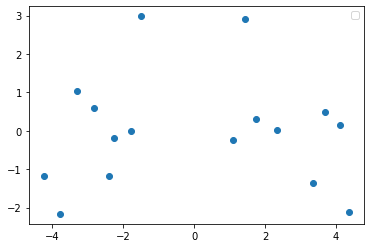

In [60]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(pd.DataFrame(A))
plot = plt.scatter(Xt[:,0], Xt[:,1])
plt.legend(handles=plot.legend_elements()[0], labels=list(df.columns))
plt.show()

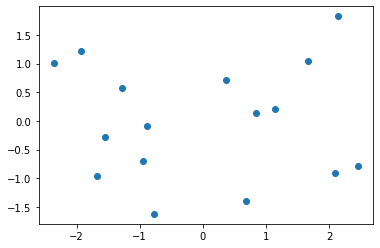

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(pd.DataFrame(A))
plot = plt.scatter(Xt[:,0], Xt[:,1])
#plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

In [71]:
VV, lamb, PCA = computePCA_corr(A.T, corr = True)
print(sum(lamb))

Number of features: m=  4
Number of samples: n= 16
4.554367738890935e-16
(16, 4) (4,) (4, 4)
Singular values: [1.55893906 0.9804092  0.68166733 0.37925777]
Eigenvalues of the covariance matrix: (variances) [2.43029099 0.96120221 0.46467035 0.14383645]
(4, 4) (4, 16)
(4, 16)
The principal component with variance proprotion 0.608 is given by the direction: [-0.5229138  -0.17713905  0.59652595  0.58252871]
The principal component with variance proprotion 0.240 is given by the direction: [0.00807487 0.97675554 0.13369503 0.16735905]
The principal component with variance proprotion 0.116 is given by the direction: [-0.84835246  0.119866   -0.29507268 -0.42292122]
The principal component with variance proprotion 0.036 is given by the direction: [ 0.08242604  0.01423081  0.73431229 -0.67363855]
--------------
The expression of the original variables in terms of the principal components is given as follows:
[[-1.14520929 -0.20585347 -0.35127392 -0.22821265]
 [-2.13579331 -1.82692136 -0.2849450

In [41]:
from sklearn.decomposition import PCA

df = pd.DataFrame(A)
features = df.columns
print(df.shape)
#print(df)
pca = PCA()
components = pca.fit_transform(df[features])
print(components)

print('Variantes ratio:', pca.explained_variance_ratio_)

print(pca.components_)
print('Singular values:', pca.singular_values_)
print('Number of features: m= ', pca.n_features_) 
print('Number of samples: n=', pca.n_samples_)

(16, 4)
[[ 2.33616589  0.02763159 -0.6113487  -0.42371803]
 [ 4.35336868 -2.12675047 -1.42283085  0.37065439]
 [ 1.10570266 -0.24063832 -1.79814637 -0.49789879]
 [ 3.68471106  0.48403484  2.14002302 -1.05860044]
 [ 1.42180965  2.90827971 -1.20204912  0.29523406]
 [ 3.34953464 -1.37262419 -0.50488667 -0.39157212]
 [ 4.11264074  0.15458217  2.47946554  1.08455516]
 [ 1.73086512  0.29514266 -0.92928776  0.25522494]
 [-2.81688024  0.58975511 -0.43183679 -0.73662089]
 [-3.79757714 -2.1654601   0.24020439  1.26222463]
 [-3.30409906  1.04539952  0.81479819 -0.76674108]
 [-1.49693922  2.98454685 -0.75368372  0.81873847]
 [-2.39927754 -1.1891191   0.3810924  -0.75561259]
 [-1.7836498  -0.00720863  0.22554479  0.72759173]
 [-2.2613339  -0.19769371  2.49658599 -0.03260905]
 [-4.23504154 -1.18987794 -1.12364434 -0.15085038]]
Variantes ratio: [0.66979347 0.15887735 0.13452316 0.03680602]
[[ 0.59576605  0.10854723 -0.60530077 -0.51661522]
 [ 0.37861843  0.83426284  0.26751107  0.29848187]
 [-0.70646

In [45]:
from sklearn.decomposition import PCA


A_stand = np.zeros(A.shape)
## Compute the correlation matrix:
for i in range(A.shape[0]):
    A_stand[i, :] = (A[i,:] - np.repeat(np.mean(A[i, :]), len(A[i, :])) ) /np.std(A[i,:])
df = pd.DataFrame(A_stand)
features = df.columns
print(df.shape)
#print(df)
pca = PCA()
components = pca.fit_transform(df[features])
print(components)

print('Variantes ratio:', pca.explained_variance_ratio_)

print(pca.components_)
print('Singular values:', pca.singular_values_)
print('Number of features: m= ', pca.n_features_) 
print('Number of samples: n=', pca.n_samples_)

(16, 4)
[[ 1.96518285e+00  9.04235697e-02 -3.26561418e-01  2.03551389e-16]
 [ 1.96811579e+00  7.08516380e-01  4.95739029e-01 -7.28153287e-17]
 [ 1.47688082e+00  1.62409661e+00 -2.00826631e-01  6.45235694e-17]
 [ 1.35290507e+00 -9.61337555e-01 -6.71401191e-01 -1.38019985e-17]
 [ 1.77740665e+00 -7.01086381e-01  1.01030175e-01 -1.02436676e-16]
 [ 2.02035697e+00  3.68819700e-01 -8.61651351e-02 -1.50860634e-17]
 [ 1.36157122e+00 -1.21404739e+00  2.28705874e-01  1.72629482e-17]
 [ 2.02429136e+00  1.02220185e-01  3.40768009e-01  9.02790886e-17]
 [-1.84295269e+00  4.46765544e-01 -4.79201038e-01 -7.56836693e-18]
 [-1.88622341e+00  4.81077932e-01  6.80443554e-01  6.46187014e-17]
 [-1.76686665e+00 -2.02593371e-01 -5.29198299e-01  6.22739819e-17]
 [-1.39792138e+00 -1.05259511e+00  5.54708767e-01  7.81879371e-17]
 [-1.84295269e+00  4.46765544e-01 -4.79201038e-01 -7.56836693e-18]
 [-1.85163409e+00 -2.79785827e-01  4.99209495e-01  5.63157466e-17]
 [-1.53050148e+00 -8.59720998e-01 -2.95344357e-01  1.9

In [46]:
from sklearn.decomposition import PCA


A_stand2 = np.zeros(A.T.shape)
## Compute the correlation matrix:
for i in range(A.T.shape[0]):
    A_stand2[i, :] = (A.T[i,:] - np.repeat(np.mean(A.T[i, :]), len(A.T[i, :])) ) /np.std(A.T[i,:])
df = pd.DataFrame(A_stand2)
features = df.columns
print(df.shape)
#print(df)
pca = PCA()
components = pca.fit_transform(df[features])
print(components)

print('Variances ratio:', pca.explained_variance_ratio_)

print(pca.components_)
print('Singular values:', pca.singular_values_)
print('Number of features: m= ', pca.n_features_) 
print('Number of samples: n=', pca.n_samples_)

(4, 16)
[[ 3.91343999e+00 -2.00515966e+00 -2.20886758e-02  2.66340790e-16]
 [ 2.05084324e+00  2.74777842e+00  4.73438264e-03  2.66340790e-16]
 [-3.04145596e+00 -3.47831972e-01 -1.07441829e+00  2.66340790e-16]
 [-2.92282727e+00 -3.94786786e-01  1.09177258e+00  2.66340790e-16]]
Variantes ratio: [7.24423890e-01 2.30014116e-01 4.55619939e-02 5.50874046e-33]
[[ 0.18392994  0.29110068  0.05804136  0.33950575  0.18157973  0.23320572
   0.38839686  0.14183886 -0.23094737 -0.36008956 -0.24335122 -0.04951404
  -0.23238184 -0.13996517 -0.1609882  -0.4003615 ]
 [-0.12237829 -0.47363351 -0.31853454  0.3324145   0.06940381 -0.24950949
   0.35595775 -0.13753889  0.01958081 -0.11649894  0.26305675  0.18339514
  -0.02571817  0.05828466  0.39875342 -0.23703501]
 [ 0.16053818 -0.15076185  0.19289403  0.3705526  -0.04385214  0.12537029
  -0.40621118 -0.07587516  0.27547648 -0.49499755  0.2814334  -0.23740183
   0.24485948 -0.26487395 -0.01795279  0.04080199]
 [ 0.41793801 -0.59728197  0.46705307  0.029577

In [42]:
VV, lamb, PCA = computePCA_corr(A.T, corr = True)

Number of features: m=  4
Number of samples: n= 16
4.554367738890935e-16
(16, 4) (4,) (4, 4)
Singular values: [1.55893906 0.9804092  0.68166733 0.37925777]
Eigenvalues of the covariance matrix: (variances) [2.43029099 0.96120221 0.46467035 0.14383645]
(4, 4) (4, 16)
(4, 16)
The principal component with variance proprotion 0.608 is given by the direction: [-0.5229138   0.00807487 -0.84835246  0.08242604]
The principal component with variance proprotion 0.240 is given by the direction: [-0.17713905  0.97675554  0.119866    0.01423081]
The principal component with variance proprotion 0.116 is given by the direction: [ 0.59652595  0.13369503 -0.29507268  0.73431229]
The principal component with variance proprotion 0.036 is given by the direction: [ 0.58252871  0.16735905 -0.42292122 -0.67363855]
--------------
The expression of the original variables in terms of the principal components is given as follows:
[[ 9.65146619e-02  6.00274820e+00 -7.06768768e+00  7.40929808e-02]
 [-1.83370442e+0

In [69]:
def computePCA_corr(A, corr = False):
    n = A.shape[1]
    m = A.shape[0]
    r = np.linalg.matrix_rank(A)
    
    print('Number of features: m= ', m) 
    print('Number of samples: n=', n)
    
    if corr:
        A_stand = np.zeros(A.shape)
        ## Compute the correlation matrix:
        for i in range(m):
            A_stand[i, :] = (A[i,:] - np.repeat(np.mean(A[i, :]), len(A[i, :])) ) /np.std(A[i,:])

        #print(A_stand)

        ## now we compute the covariance matrix of the standarized matrix:
        Y = 1/np.sqrt(n)* A_stand.T

        ## checking that the matrix corresponds to the correlation matrix:
        #print(np.corrcoef(A))
        #print(np.matmul(Y.T, Y))
        print(np.linalg.norm(np.corrcoef(A) - np.matmul(Y.T, Y)))
    else: 
        Y = 1/np.sqrt(n-1)* A.T
    
    U,s,V = svd(Y,full_matrices=False)
    #reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    print(U.shape, s.shape, V.shape)
    
    ## here V = V^t, is the output of the svd function
    
    eigvals = s**2
    print('Singular values:', s)
    print('Eigenvalues of the covariance matrix: (variances)', eigvals)
    propV = np.zeros(s.shape)
    totalV = np.sum(eigvals)
    for i in range(s.shape[0]):
        propV[i] = eigvals[i]/totalV
    
    print(V.shape, A.shape)
    
    if corr:
        PCA = np.matmul(V, A_stand)
    else:
        PCA = np.matmul(V, A)
    print(PCA.shape)
    
    #PCA = np.matmul(V, A)
    #print(PCA.shape)
    
    ## Each column of V.T = V, or each row of V=V^t
    for i in range(len(propV)):
        print('The principal component with variance proprotion {:.3f}'.format(propV[i])+' is given by the direction:', V.T[:, i])  
    
    print('--------------')
    print('The expression of the original variables in terms of the principal components is given as follows:')

    print(PCA.T)
    #for i in range(PCA.shape[]):
    #    print(PCA[:, i])
        
    return PCA, propV, V


In [70]:
print(A)
print(A.shape)
VV, lamb, PCA = computePCA_corr(A.T, corr = True)

[[6. 5. 3. 4.]
 [7. 3. 2. 2.]
 [6. 4. 4. 5.]
 [5. 7. 1. 3.]
 [7. 7. 5. 5.]
 [6. 4. 2. 3.]
 [5. 7. 2. 1.]
 [6. 5. 4. 4.]
 [3. 5. 6. 7.]
 [1. 3. 7. 5.]
 [2. 6. 6. 7.]
 [5. 7. 7. 6.]
 [2. 4. 5. 6.]
 [3. 5. 6. 5.]
 [1. 6. 5. 5.]
 [2. 3. 7. 7.]]
(16, 4)
Number of features: m=  4
Number of samples: n= 16
4.554367738890935e-16
(16, 4) (4,) (4, 4)
Singular values: [1.55893906 0.9804092  0.68166733 0.37925777]
Eigenvalues of the covariance matrix: (variances) [2.43029099 0.96120221 0.46467035 0.14383645]
(4, 4) (4, 16)
(4, 16)
The principal component with variance proprotion 0.608 is given by the direction: [-0.5229138  -0.17713905  0.59652595  0.58252871]
The principal component with variance proprotion 0.240 is given by the direction: [0.00807487 0.97675554 0.13369503 0.16735905]
The principal component with variance proprotion 0.116 is given by the direction: [-0.84835246  0.119866   -0.29507268 -0.42292122]
The principal component with variance proprotion 0.036 is given by the direction: [ 

In [40]:
print(A)
print(A.shape)
VV, lamb, PCA = computePCA_corr(A.T, corr = False)

[[6. 5. 3. 4.]
 [7. 3. 2. 2.]
 [6. 4. 4. 5.]
 [5. 7. 1. 3.]
 [7. 7. 5. 5.]
 [6. 4. 2. 3.]
 [5. 7. 2. 1.]
 [6. 5. 4. 4.]
 [3. 5. 6. 7.]
 [1. 3. 7. 5.]
 [2. 6. 6. 7.]
 [5. 7. 7. 6.]
 [2. 4. 5. 6.]
 [3. 5. 6. 5.]
 [1. 6. 5. 5.]
 [2. 3. 7. 7.]]
(16, 4)
Number of features: m=  4
Number of samples: n= 16
(16, 4) (4,) (4, 4)
Singular values: [9.67717926 2.98740437 1.38390184 0.7158438 ]
Eigenvalues of the covariance matrix: (variances) [93.64779846  8.92458488  1.91518432  0.51243235]
(4, 4) (4, 16)
(4, 16)
The principal component with variance proprotion 0.892 is given by the direction: [-0.4390472   0.72389617  0.52933835  0.05488905]
The principal component with variance proprotion 0.085 is given by the direction: [-0.544242    0.25276353 -0.79957979  0.02415363]
The principal component with variance proprotion 0.018 is given by the direction: [-0.49623305 -0.49926238  0.20052205  0.6813815 ]
The principal component with variance proprotion 0.005 is given by the direction: [-0.51457844 -0.

In [23]:
import numpy as np
from numpy.linalg import svd


VV, lamb, PCA = computePCA_corr(A.T)

(16, 4) (4,) (4, 4)
[9.67717926 2.98740437 1.38390184 0.7158438 ] [93.64779846  8.92458488  1.91518432  0.51243235]
(4, 4) (4, 16)
(4, 16)
The principal component with variance proprotion 0.892 is given by the direction: [-0.4390472   0.72389617  0.52933835  0.05488905]
The principal component with variance proprotion 0.085 is given by the direction: [-0.544242    0.25276353 -0.79957979  0.02415363]
The principal component with variance proprotion 0.018 is given by the direction: [-0.49623305 -0.49926238  0.20052205  0.6813815 ]
The principal component with variance proprotion 0.005 is given by the direction: [-0.51457844 -0.4035121   0.20065885 -0.72946764]
--------------
The expression of the original variables in terms of the principal components is given as follows:
[[ -8.90250607   2.49535915   0.58233267  -0.42362365]
 [ -6.72767935   4.02001483   2.10899085   0.36051193]
 [ -9.36907556   1.33982115   1.78309337  -0.49586342]
 [ -8.04489834   3.67902689  -2.14786822  -1.0635008 ]

In [76]:

VV, lamb, PCA = computePCA_corr(A.T, corr = True)

Number of features: m=  4
Number of samples: n= 16
4.554367738890935e-16
(16, 4) (4,) (4, 4)
Singular values: [1.55893906 0.9804092  0.68166733 0.37925777]
Eigenvalues of the covariance matrix: (variances) [2.43029099 0.96120221 0.46467035 0.14383645]
(4, 4) (4, 16)
(4, 16)
The principal component with variance proprotion 0.608 is given by the direction: [-0.5229138  -0.17713905  0.59652595  0.58252871]
The principal component with variance proprotion 0.240 is given by the direction: [0.00807487 0.97675554 0.13369503 0.16735905]
The principal component with variance proprotion 0.116 is given by the direction: [-0.84835246  0.119866   -0.29507268 -0.42292122]
The principal component with variance proprotion 0.036 is given by the direction: [ 0.08242604  0.01423081  0.73431229 -0.67363855]
--------------
The expression of the original variables in terms of the principal components is given as follows:
[[-1.14520929 -0.20585347 -0.35127392 -0.22821265]
 [-2.13579331 -1.82692136 -0.2849450

In [74]:
PCA.shape

(4, 16)